In [1]:
import importlib
from datetime import datetime, timedelta

from binance import Client

import poly_api
import poly_datasets
import analysis

In [ ]:
# Markets(bets) for a poll: https://polymarket.com/event/what-price-will-bitcoin-hit-in-february?tid=1741628565740


poll_markets = "0x480691cf1edbe926d4efcabfc084e8f60558916b1de183472aa0552ef8716b50,0x7d08ca866cc7f0eff0336357de08d747c235d8594b1f58d2425f8a0c933c5baa,0x6e5a58ad9335fb9334ea721634739e43d877af1398df97517fbc40abea4ec936,0x45060e3ad88e835074c1d7853d36d504c6f0d00120090bfe607b7dc5afdcb554,0x00661b4efa15d1ae67324e24f80fa767af020110b5db4b42ae5f528165754c31,0xbc259989970aa172c5caf59b1cb9f4c06271382a37b2b64d11864d05d15eb140,0x4165a276c3f1feb7e905c011925ff002c5bdfa62c81acebc2aae23a2642c8a4e,0xf36b89b9382415b3b6204188e5b69afbeff70c99c54b294c6dd63d00ed9ddbad,0xf79f84f044be0ea23cd3bcd33fc886a44fd3ae595f2dd59da3d0b7492897c0aa,0x3f927aff2c902bba0bd543aa984b60ed94b3a01eefaf834dfe9e964d42855148,0x87d9d0470879bb3b1ccb05e1ce06fc8f760c24a3dcb0dd677d42c4e95bbcd866,0x9d87adf2dbb64b312d9b7823f155644c6189b28c260e877396c40229e676ef4b,0x35da12adf7cbaf89e5b2caf72ffded06da30e4b889813c570969218382a73be5".split(
    ","
)
market_ids = poll_markets

market_data = poly_api.load_markets_data(market_ids, 30)
market_data = market_data[market_data.index <= "2025-02-27"]

market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2025-02-11 18:30:00 to 2025-02-27 00:00:00
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   will-bitcoin-reach-200000-by-february-28-2025   731 non-null    float64
 1   will-bitcoin-reach-150000-by-february-28-2025   731 non-null    float64
 2   will-bitcoin-reach-140000-by-february-28-2025   731 non-null    float64
 3   will-bitcoin-reach-130000-by-february-28-2025   732 non-null    float64
 4   will-bitcoin-reach-120000-by-february-28-2025   732 non-null    float64
 5   will-bitcoin-reach-115000-by-february-28-2025   731 non-null    float64
 6   will-bitcoin-reach-110000-by-february-28-2025   731 non-null    float64
 7   will-bitcoin-dip-to-100000-by-february-28-2025  0 non-null      float64
 8   will-bitcoin-dip-to-95000-by-february-28-2025   0 non-null      float64
 9   will-b

In [18]:
market_data.head()

,will-bitcoin-reach-200000-by-february-28-2025,will-bitcoin-reach-150000-by-february-28-2025,will-bitcoin-reach-140000-by-february-28-2025,will-bitcoin-reach-130000-by-february-28-2025,will-bitcoin-reach-120000-by-february-28-2025,will-bitcoin-reach-115000-by-february-28-2025,will-bitcoin-reach-110000-by-february-28-2025,will-bitcoin-dip-to-100000-by-february-28-2025,will-bitcoin-dip-to-95000-by-february-28-2025,will-bitcoin-dip-to-90000-by-february-28-2025,will-bitcoin-dip-to-85000-by-february-28-2025,will-bitcoin-dip-to-75000-by-february-28-2025,will-bitcoin-dip-to-60000-by-february-28-2025
date,,,,,,,,,,,,,
2025-02-11 18:30:00,NaN,NaN,NaN,0.0340,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-11 19:00:00,0.0085,0.0160,0.0190,0.0340,0.065,0.105,0.215,NaN,NaN,0.510,0.245,0.0380,0.0140
2025-02-11 19:30:00,0.0075,0.0150,0.0190,0.0340,0.060,0.105,0.205,NaN,NaN,0.535,0.265,0.0445,0.0140
2025-02-11 20:00:00,0.0070,0.0140,0.0185,0.0335,0.060,0.105,0.185,NaN,NaN,0.555,0.265,0.0465,0.0135
2025-02-11 20:30:00,0.0065,0.0135,0.0185,0.0340,0.055,0.095,0.175,NaN,NaN,0.580,0.285,0.0530,0.0160


In [ ]:
pm_df = market_data

result = poly_datasets.process_pm_df(pm_df)

Column will-bitcoin-dip-to-100000-by-february-28-2025 has no data. Skipping
Column will-bitcoin-dip-to-95000-by-february-28-2025 has no data. Skipping


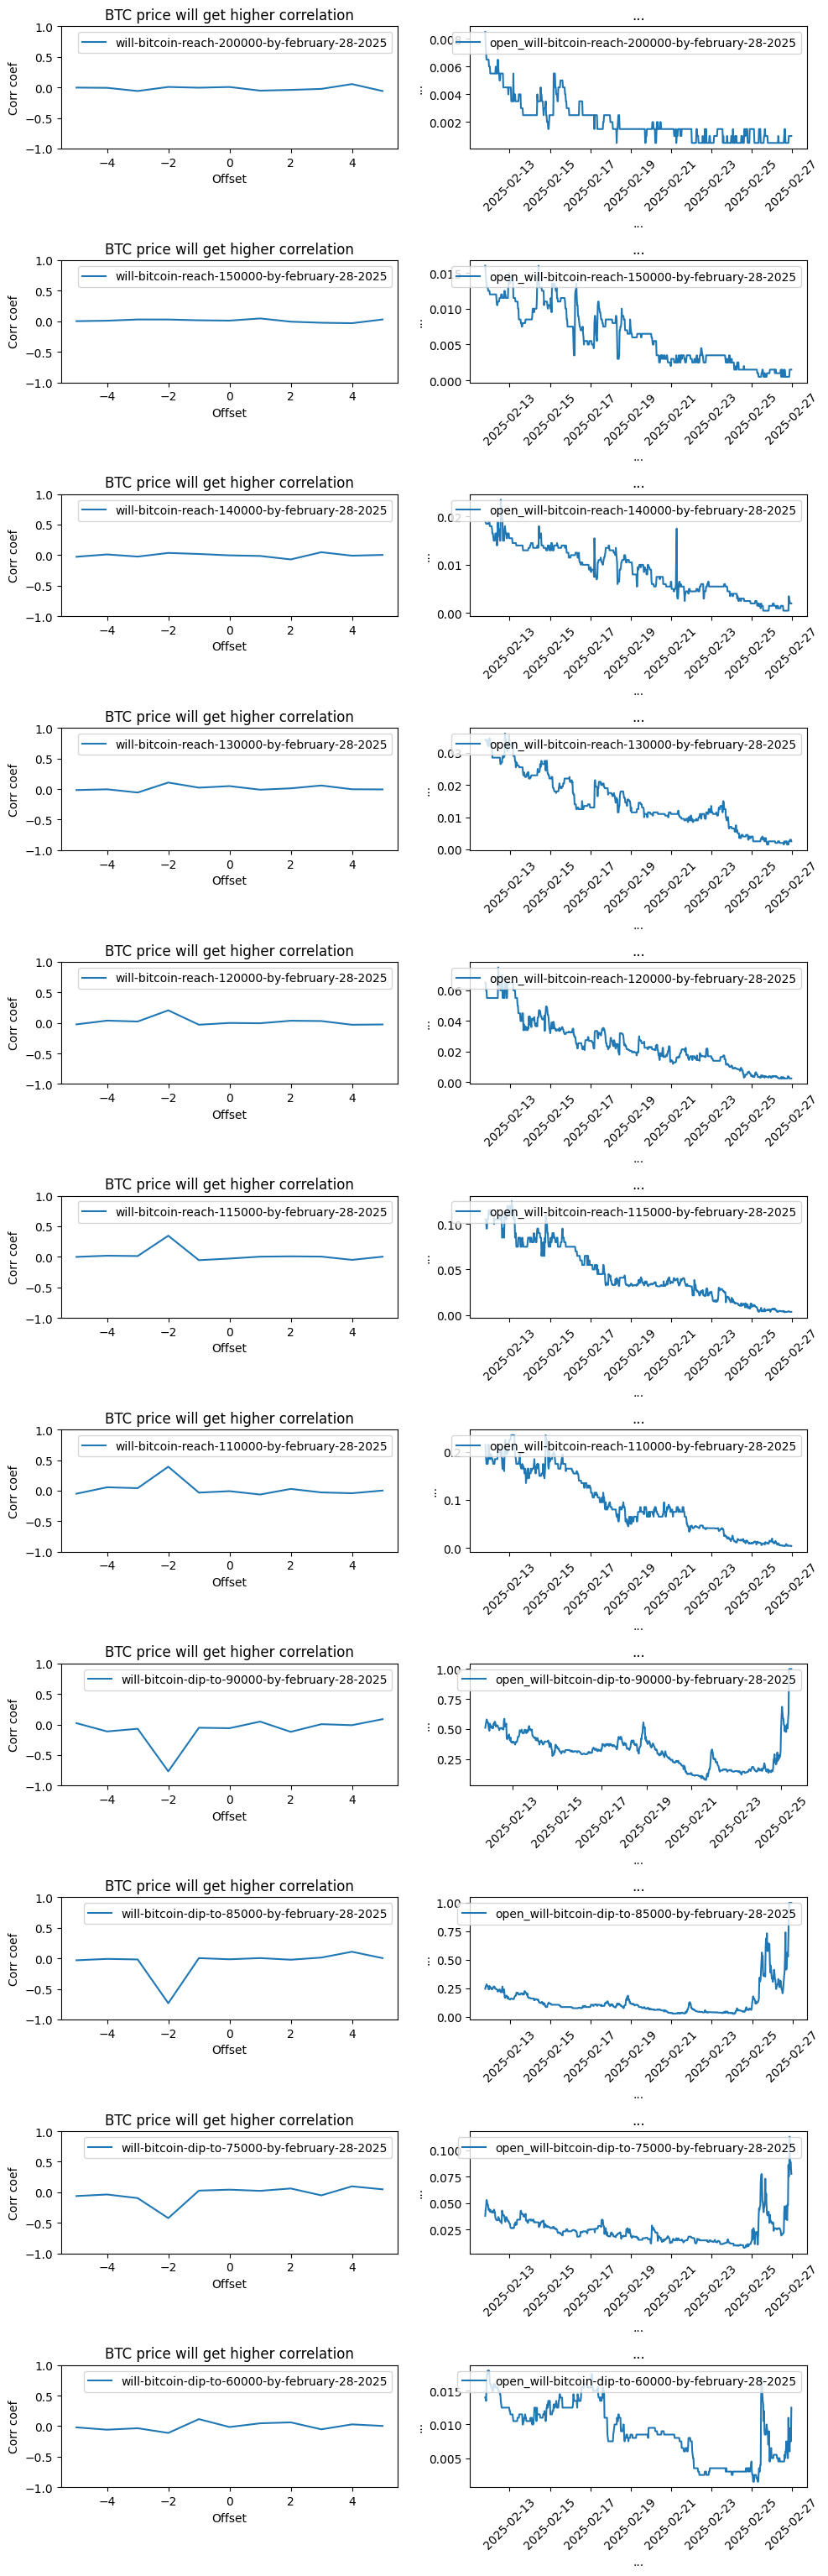

In [ ]:



analysis.plot_delta_correlation(result, Client.KLINE_INTERVAL_30MINUTE, 5)

Column will-bitcoin-dip-to-100000-by-february-28-2025 has no data. Skipping
Column will-bitcoin-dip-to-95000-by-february-28-2025 has no data. Skipping


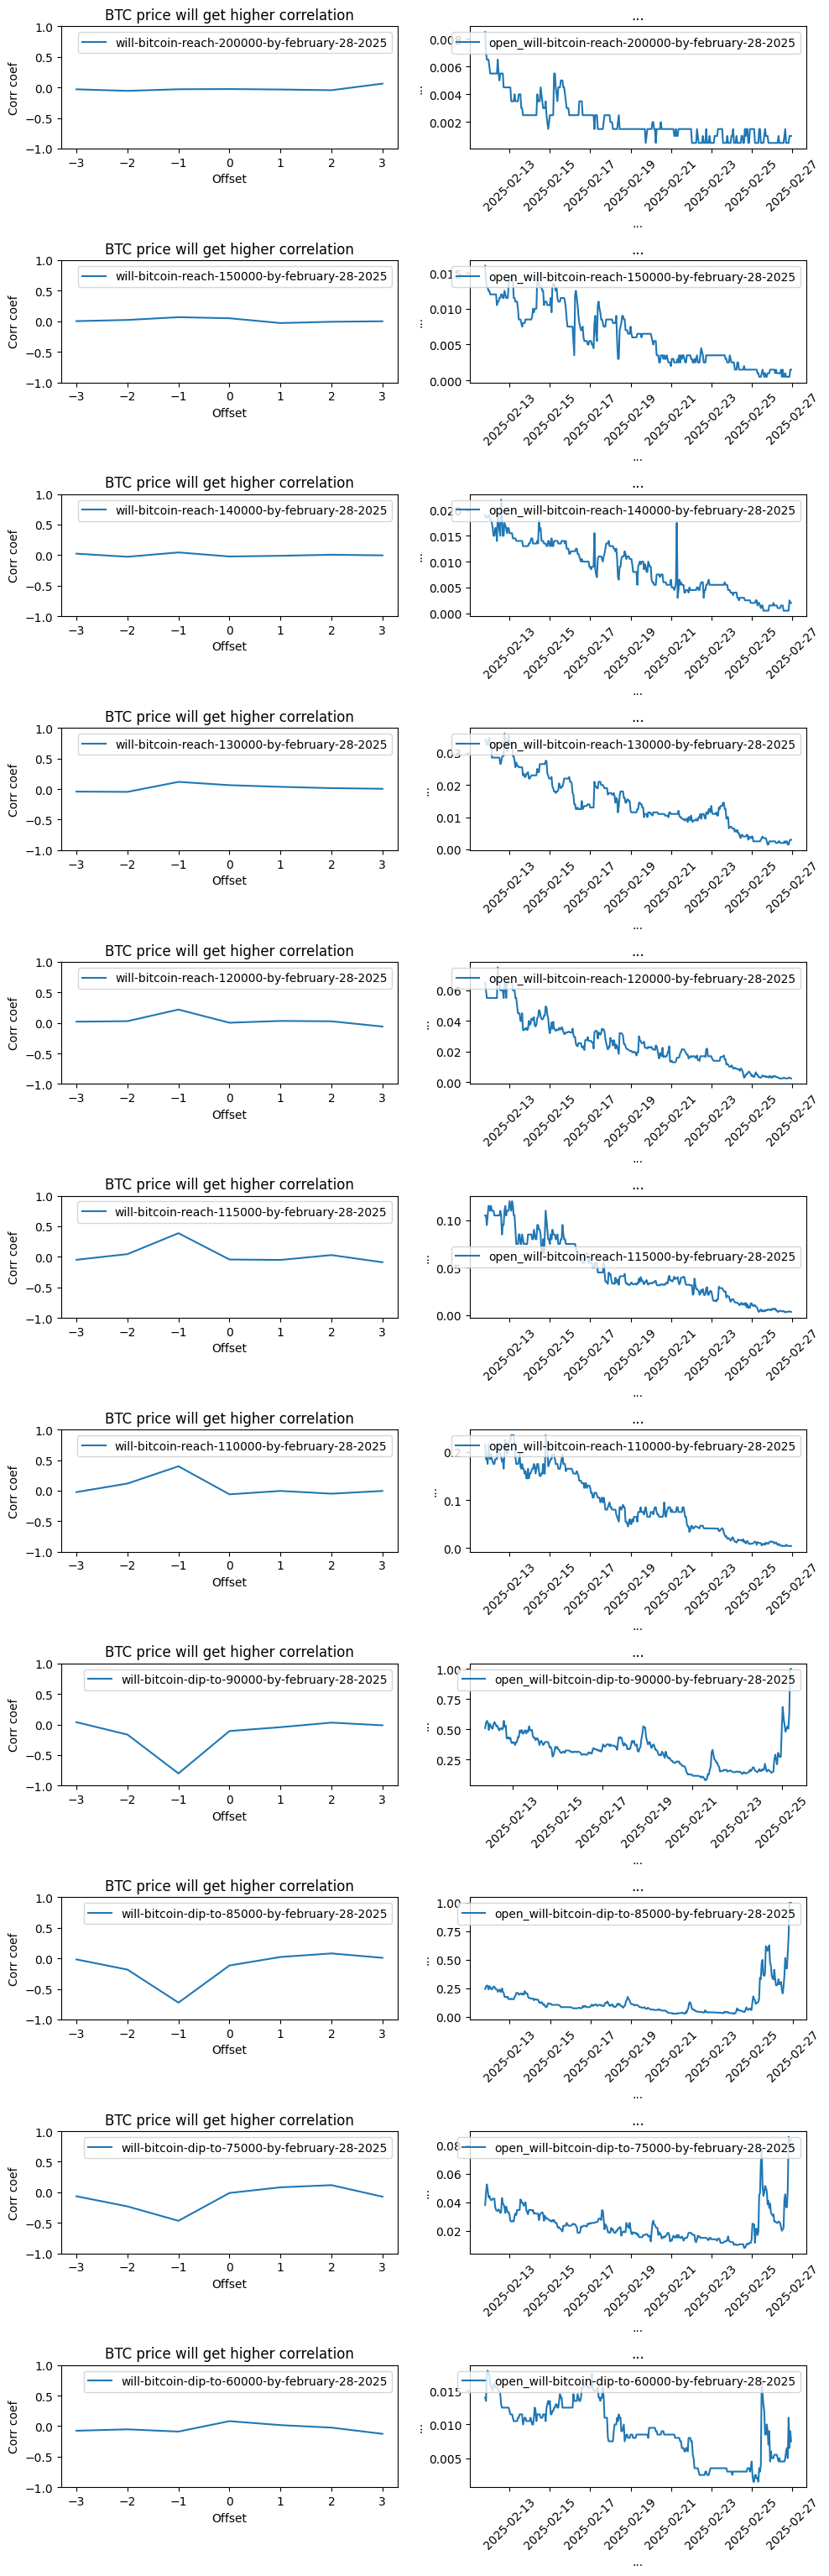

In [ ]:
import data

fidelity = 60
market_data = poly_api.load_markets_data(market_ids, fidelity)
market_data = market_data[market_data.index <= "2025-02-27"]

result = poly_datasets.process_pm_df(market_data)

analysis.plot_delta_correlation(result, data.FIDELITY_MAPPING[fidelity], 3)

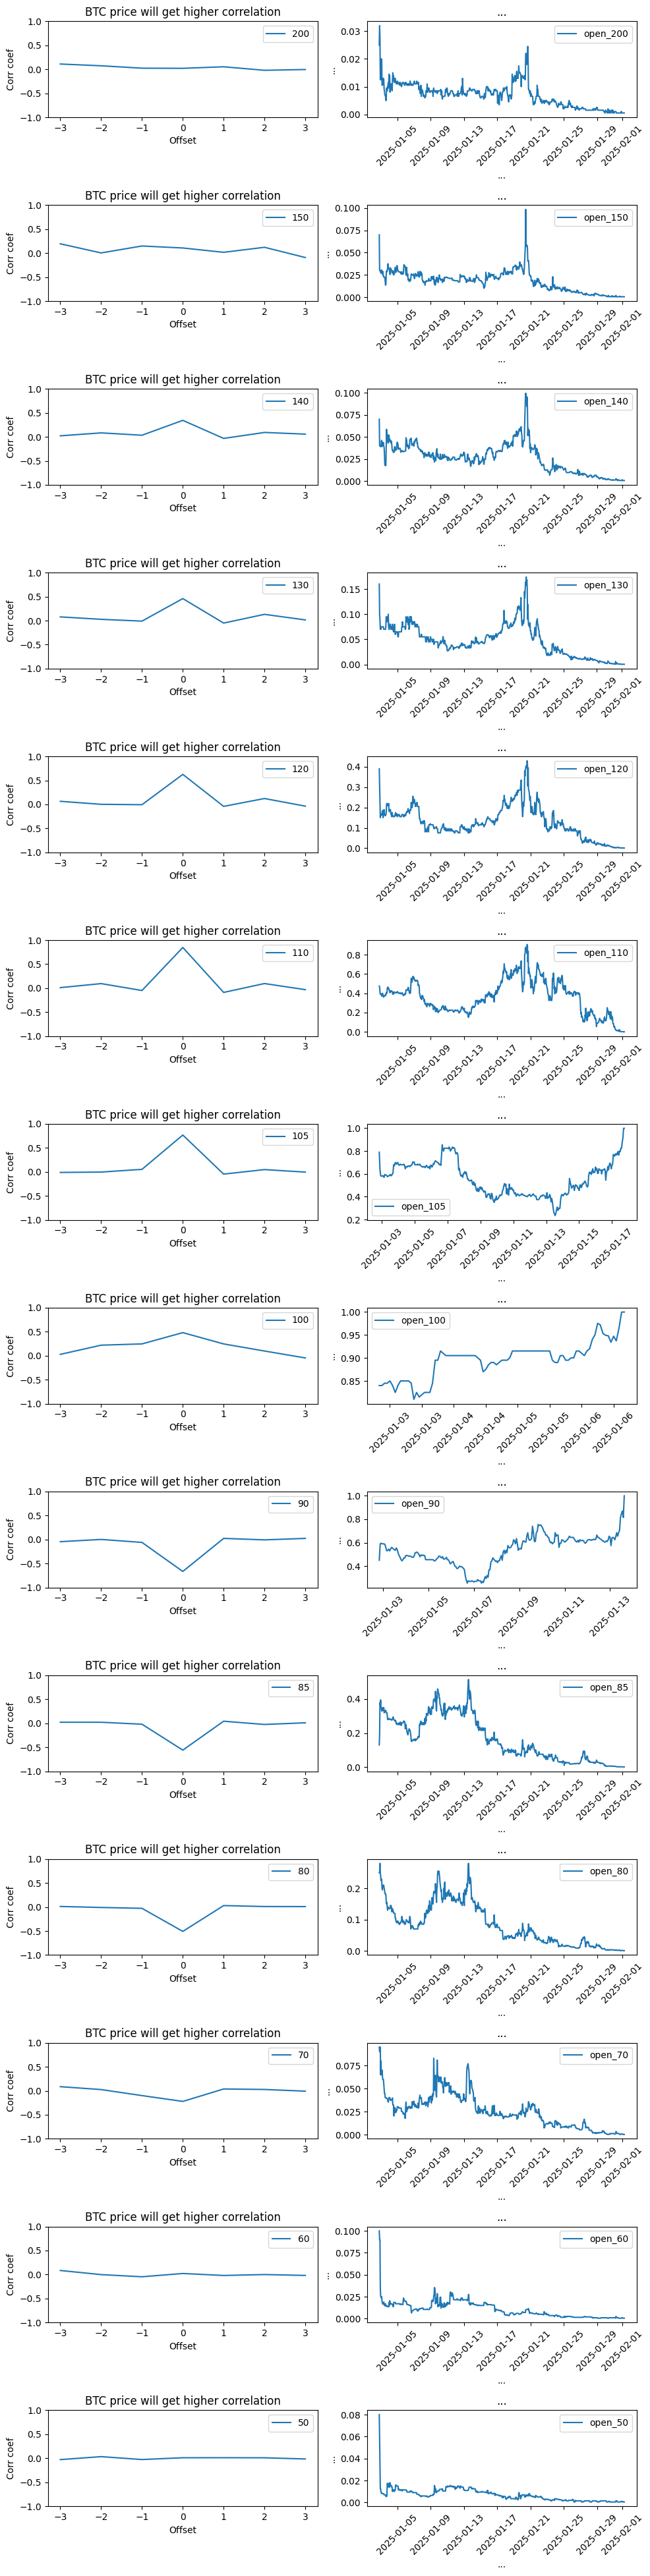

In [ ]:
result = poly_datasets.load_pm_dataset("2_pm_BTC_1h.csv")

analysis.plot_delta_correlation(result, Client.KLINE_INTERVAL_1HOUR, 3)

In [45]:
# importlib.reload(poly_api)

market_ids = "0xc2c1038424a37a044781d1915e82ddbea1515d79cdb8966a2bf0a658b178b21c,0x69c7ea583787dee4228468864414f33c84c3ab58c2eaba37ca7a5c0aed4e899e,0xd7fa09afd9c184f94edb6f15f5f98640dc3f5418ffbd520a10ef3f4775414c73,0x78dd44195111f89210b059180792a1fa156d1f211392e76575dc36846e815987,0x7c662197ecf9c6c2441c1cb57e8c8a761a5782eeb0c219dc14daf3f165d188a1,0x0f3131c874579825ecdbbda8c7aeed071aa908d7c993792c393285900e68906f,0x44c5b4d851e8c06698c13b54e8ba33e37637e13bdb3f375ce0b6727b2aa06b48,0x0bdabf234110590a6475e88f386ec7512f0f0d8038989e39259f0eb995650594,0xcdab757d22e9ca242163475ed1426e6a8d2c9a579b39198f7cec223024ee2e89,0x8d29692749f246da11fb329a2ecaf95d08cc6c97d3f8ebe0c052d1ce42057595,0xda728da52dda8a465dd49a1e9a6daa000b2116bd799b18ec383c68e68c693bda,0x263c7f77dc9cc2a68ce238794051b4801ae0d0aa0b1242a54726a8860a1809e8,0xd100eaa5eb47d06b9f3f4ff37ad34c1e588b3f322cd8d7d408c379a2ce3ea03e,0x906a2b90f30c62e09dce56fababafafbc4338cb8dac94ac6c3038327d0447180".split(
    ","
)
fidelity = 3
ts_options = poly_api.TSOptions(
    fidelity,
    (datetime.fromisoformat("2025-01-02 19:00"), datetime.fromisoformat("2025-01-30 23:00")),
)
market_data = poly_api.load_markets_data(market_ids, ts_options)

print(market_data.info())
market_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13497 entries, 2025-01-02 19:09:00 to 2025-01-30 21:57:00
Freq: 3min
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   will-bitcoin-reach-200000-by-january-31-2025  13497 non-null  float64
 1   will-bitcoin-reach-150000-by-january-31-2025  13494 non-null  float64
 2   will-bitcoin-reach-140000-by-january-31-2025  13494 non-null  float64
 3   will-bitcoin-reach-130000-by-january-31-2025  13494 non-null  float64
 4   will-bitcoin-reach-120000-by-january-31-2025  13494 non-null  float64
 5   will-bitcoin-reach-110000-by-january-31-2025  13494 non-null  float64
 6   will-bitcoin-reach-105000-by-january-31-2025  7195 non-null   float64
 7   will-bitcoin-reach-100000-by-january-31-2025  1878 non-null   float64
 8   will-bitcoin-dip-to-90000-by-january-31-2025  5231 non-null   float64
 9   will-bitcoin-di

,will-bitcoin-reach-200000-by-january-31-2025,will-bitcoin-reach-150000-by-january-31-2025,will-bitcoin-reach-140000-by-january-31-2025,will-bitcoin-reach-130000-by-january-31-2025,will-bitcoin-reach-120000-by-january-31-2025,will-bitcoin-reach-110000-by-january-31-2025,will-bitcoin-reach-105000-by-january-31-2025,will-bitcoin-reach-100000-by-january-31-2025,will-bitcoin-dip-to-90000-by-january-31-2025,will-bitcoin-dip-to-85000-by-january-31-2025,will-bitcoin-dip-to-80000-by-january-31-2025,will-bitcoin-dip-to-70000-by-january-31-2025,will-bitcoin-dip-to-60000-by-january-31-2025,will-bitcoin-dip-to-50000-by-january-31-2025
date,,,,,,,,,,,,,,
2025-01-02 19:09:00,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 19:12:00,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 19:15:00,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 19:18:00,0.5,0.5,0.5,0.5,0.500,0.500,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 19:21:00,0.5,0.5,0.5,0.5,0.605,0.785,0.825,0.85,0.5,0.5,0.5,0.5,0.5,0.5


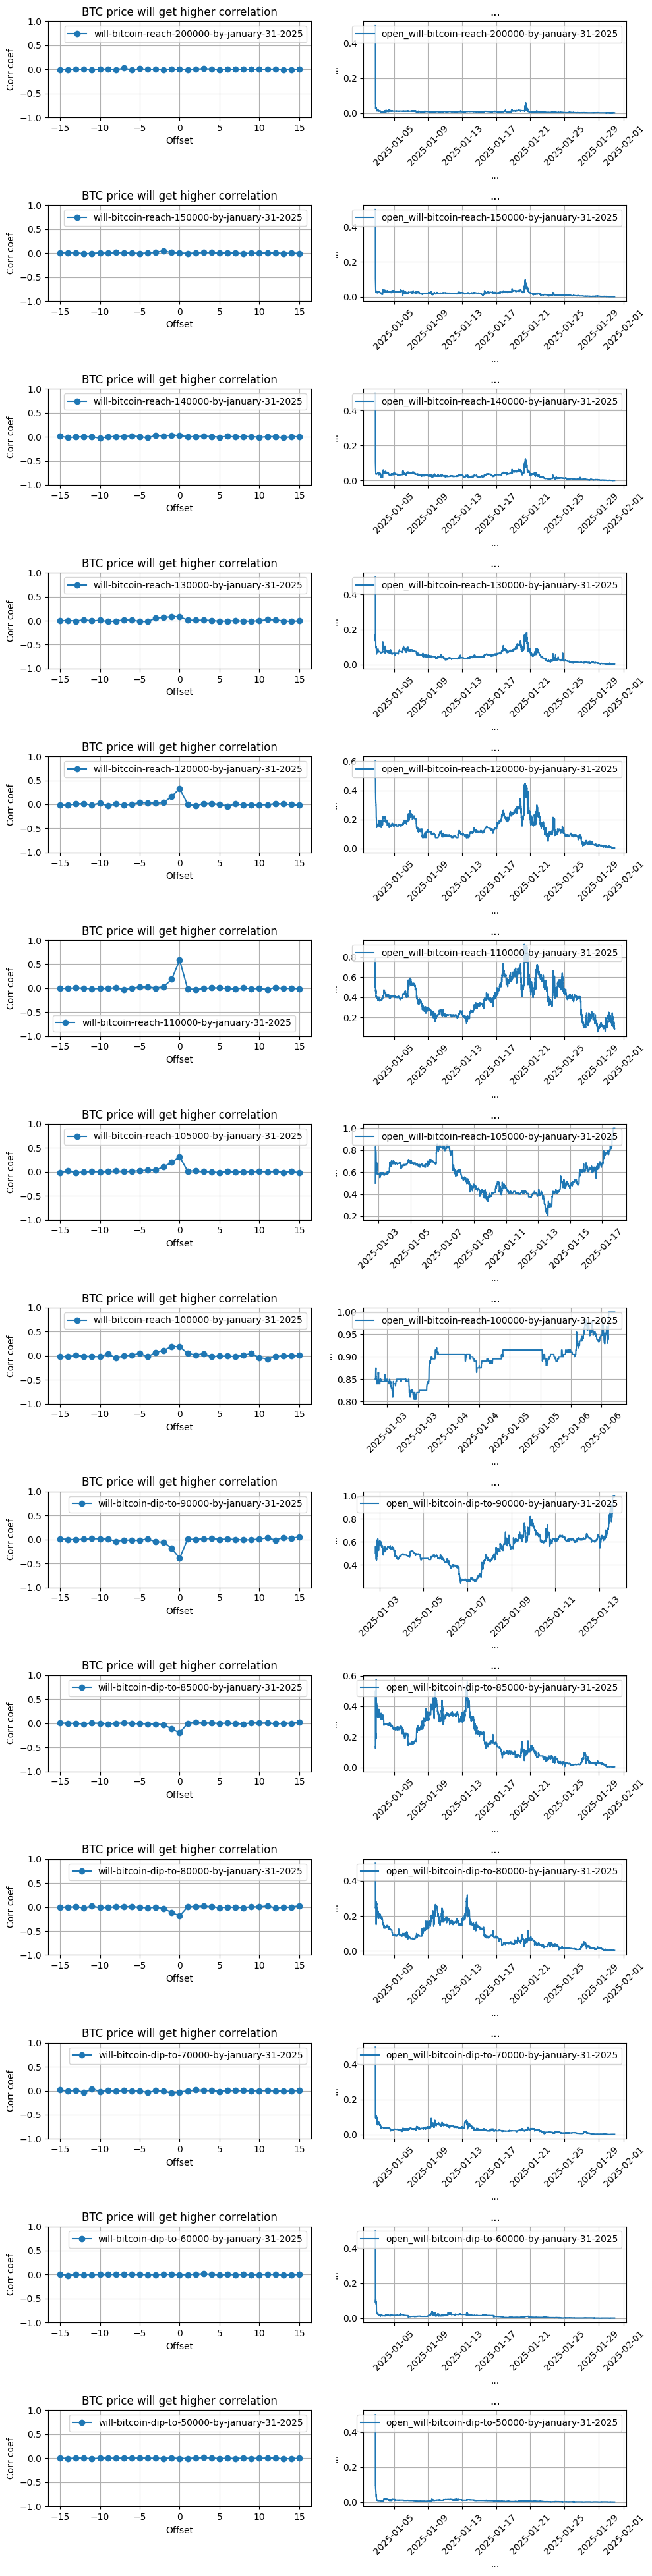

In [ ]:
# importlib.reload(analysis)

import data

processed_market_data = poly_datasets.process_pm_df(market_data)

analysis.plot_delta_correlation(
    processed_market_data, data.FIDELITY_MAPPING[fidelity], 15
)